In [1]:
%matplotlib inline
import spartan2.spartan as st

In [2]:
# set the computing engine
st.config(st.engine.SINGLEMACHINE)

In [3]:
# load graph data
data = st.loadTensor(name = "example_graph", path = "inputData/", col_types = [int, int, int], hasvalue=1)

Info: Tensor is loaded
           ----------------------
             attr     |	2
             values   |	1
             nonzeros |	1569207



In [4]:
graph = data.toGraph()

In [5]:
# create a eigen decomposition model
edmodel = st.decomposition.create(graph.sm, st.ed_policy.SVDS, "my_svds_model")

In [6]:
U,S,V = edmodel.run(k=2)

In [7]:
U.shape, S.shape, V.shape, U[:10], V[:10]

((33374, 2), (2,), (65911, 2), array([[ 2.47874891e-04, -2.48277982e-04],
        [ 9.78766659e-05,  2.19158300e-04],
        [ 9.96969966e-05,  3.41005622e-04],
        [ 6.10638097e-03,  1.67891131e-02],
        [ 7.84294756e-04, -8.87094600e-04],
        [ 3.00468034e-05,  2.22925004e-04],
        [ 2.74464209e-04,  7.27574906e-05],
        [ 1.37985455e-04, -4.02940118e-04],
        [ 3.70867734e-05,  1.28570390e-04],
        [ 6.07279604e-03,  1.06159299e-02]]), array([[ 0.00014602, -0.00054503],
        [ 0.0006514 , -0.0016683 ],
        [ 0.01650477, -0.0245407 ],
        [ 0.03002005, -0.03269422],
        [ 0.02308551, -0.02649508],
        [ 0.00289192, -0.00414879],
        [ 0.00528723, -0.01080647],
        [ 0.02825361, -0.01754751],
        [ 0.004666  , -0.01064132],
        [ 0.00423448, -0.00846382]]))

In [8]:
# create a anomaly detection model
emmodel = st.anomaly_detection.create(graph, st.ad_policy.EAGLEMINE, "my_eaglemine_model")


In [9]:
du, dv = graph.degrees()

total shape: (33374, 2), valid samples:33353
Histogram Info:
	 Histogram shape: [66, 71]
	 #points: 33353, #mode: 2
Graph feature to histogram done!
histogram: temp/histogram.out;  hode2pos: temp/node2hcel.out;  hpos_avgfeat: temp/hcel2avgfeat.out
EagleMine algorithm
*****************
[0]. initialization and loading
*****************
[1]. WaterLevelTree

Construct raw-tree.
Info: maximum tree level: 9.999999999999998
Info: Level-Tree build done!

Refine tree structure.

+++++++++ 
a). tree contract
Info: Level-tree contract done!
Info: Contract level-tree:
Level tree basic information:
#node: 5, #level: 3
(node id): {@level, parent node, #childs, #elements}
|---- (0): 1.0, -1, [22, 23], 289 |-
    |---- (22): 6.599999999999999, 0, None, 5 |-
    |---- (23): 6.599999999999999, 0, [28, 29], 75 |-
        |---- (28): 7.599999999999999, 23, None, 5 |-
        |---- (29): 7.599999999999999, 23, None, 32 |-
dump done!

+++++++++ 
b). tree prune
Info: Level-tree prune done!
Info: Pruned level

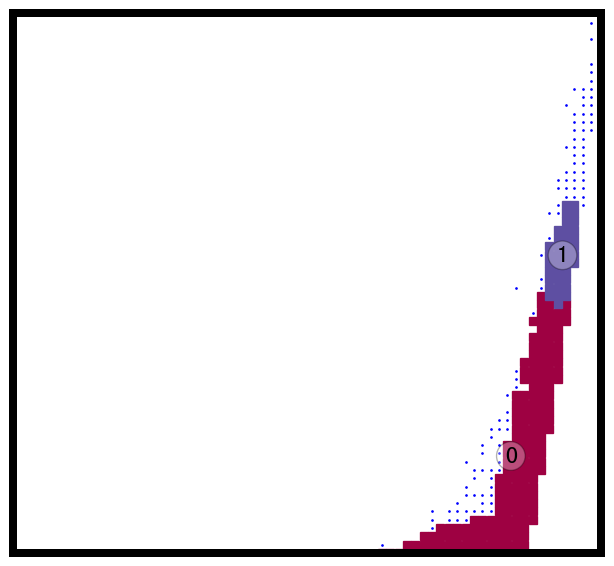

In [10]:
# run the eaglemine model
emmodel.run(U[:,0], du)

In [11]:
V.shape, dv.shape

((65911, 2), (65911, 1))

total shape: (65911, 2), valid samples:65890
Histogram Info:
	 Histogram shape: [61, 71]
	 #points: 65890, #mode: 2
Graph feature to histogram done!
histogram: temp/histogram.out;  hode2pos: temp/node2hcel.out;  hpos_avgfeat: temp/hcel2avgfeat.out
EagleMine algorithm
*****************
[0]. initialization and loading
*****************
[1]. WaterLevelTree

Construct raw-tree.
Info: maximum tree level: 11.599999999999998
Info: Level-Tree build done!

Refine tree structure.

+++++++++ 
a). tree contract
Info: Level-tree contract done!
Info: Contract level-tree:
Level tree basic information:
#node: 10, #level: 4
(node id): {@level, parent node, #childs, #elements}
|---- (0): 1.0, -1, None, 8 |-
|---- (1): 1.0, -1, None, 8 |-
|---- (2): 1.0, -1, [47, 48], 155 |-
    |---- (47): 7.199999999999998, 2, None, 5 |-
    |---- (48): 7.199999999999998, 2, [54, 55, 56], 60 |-
        |---- (54): 8.2, 48, None, 5 |-
        |---- (55): 8.2, 48, None, 5 |-
        |---- (56): 8.2, 48, [58, 59], 36 |-
 

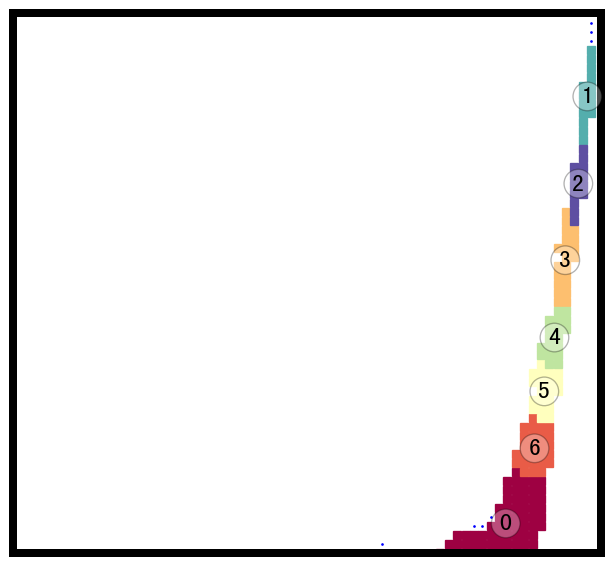

In [12]:
emmodel.run(V[:,0], dv)

In [13]:
A, B = emmodel.nodes(n=0)

In [14]:
g = st.subgraph(data, A, B)

TypeError: 'STTensor' object does not support indexing